In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime
import os
import ids
from PIL import Image
import time
import tifffile

In [ ]:
today=datetime.datetime.now().year,datetime.datetime.now().month,datetime.datetime.now().day
Folder_name='-'.join(map(str,today))
print('Current data is recorded in the folder ' + Folder_name)
filepath = 'home/user/Desktop/Data/'+str(Folder_name)

#if already created, don't create.
try:
    os.mkdir(Folder_name)
except:
    pass

In [ ]:
cam = ids.Camera()
cam.color_mode = ids.ids_core.COLOR_RGB8  # Get images in RGB format
cam.exposure = 5
cam.auto_exposure=True
cam.auto_exposure_brightness=True
cam.auto_white_balance=True
cam.continuous_capture = True
#cam.continuous_capture = False  # Stop capture to change color mode
#cam.color_mode = ids.ids_core.COLOR_BGR8

for u in range(14):
    for i in range(7):
        meta = cam.next_save('ids_'+str(u+i)+'.jpg')
        ser.write(b'GR,28000,0\r\n'); time.sleep(2) #move relatively 100000 
    ser.write(b'GR,-196000,28000\r\n'); time.sleep(2)

In [3]:
#Configure serial port

import serial
with serial.Serial('/dev/ttyACM0', timeout=1) as ser:
    x = ser.read()
    s = ser.read(10)
    line = ser.readline()
ser.open()


In [22]:
cam = ids.Camera()
cam.color_mode = ids.ids_core.COLOR_RGB8
cam.exposure = 5
cam.auto_exposure=True
cam.continuous_capture = True


stitch=[]
for u in range(14):
    for i in range(7):
        img,meta=cam.next() #Get image as a numpy array
        stitch.append(img)
        ser.write(b'GR,28000,0\r\n'); time.sleep(2)
    ser.write(b'GR,-196000,28000\r\n'); time.sleep(2)
stitch=np.asarray(stitch)
print 'stitch has shape: {}'.format(stitch.shape)

stitch has shape: (98, 1920, 2560, 3)


In [9]:
pil_img = Image.fromarray(img)
pil_img.save("pil.jpg", quality=95)

In [13]:
ser.write(b'GR,196000,0\r\n') #move relatively 100000 
#100 = 1um
#Diameter of one field of view: 700um

13

In [4]:
cam = ids.Camera()
cam.color_mode = ids.ids_core.COLOR_RGB8
cam.exposure = 5
cam.auto_exposure=True



In [27]:
cam.continuous_capture = True
img,meta=cam.next()
cam.continuous_capture = False

IOError: No image memory available.

In [ ]:
plt.savefig('images/'+str(image_index)+'.png',bbox_inches='tight',pad_inches=0)
plt.close()

In [8]:
cam.free_all()
cam.close()

In [5]:
num_ports = 2
# power cycle USB ports
for i in range(num_ports):
    # disable ASLR
    os.system('echo 0 | sudo tee /sys/bus/usb/devices/usb' + str(i+1) + '/power/autosuspend')

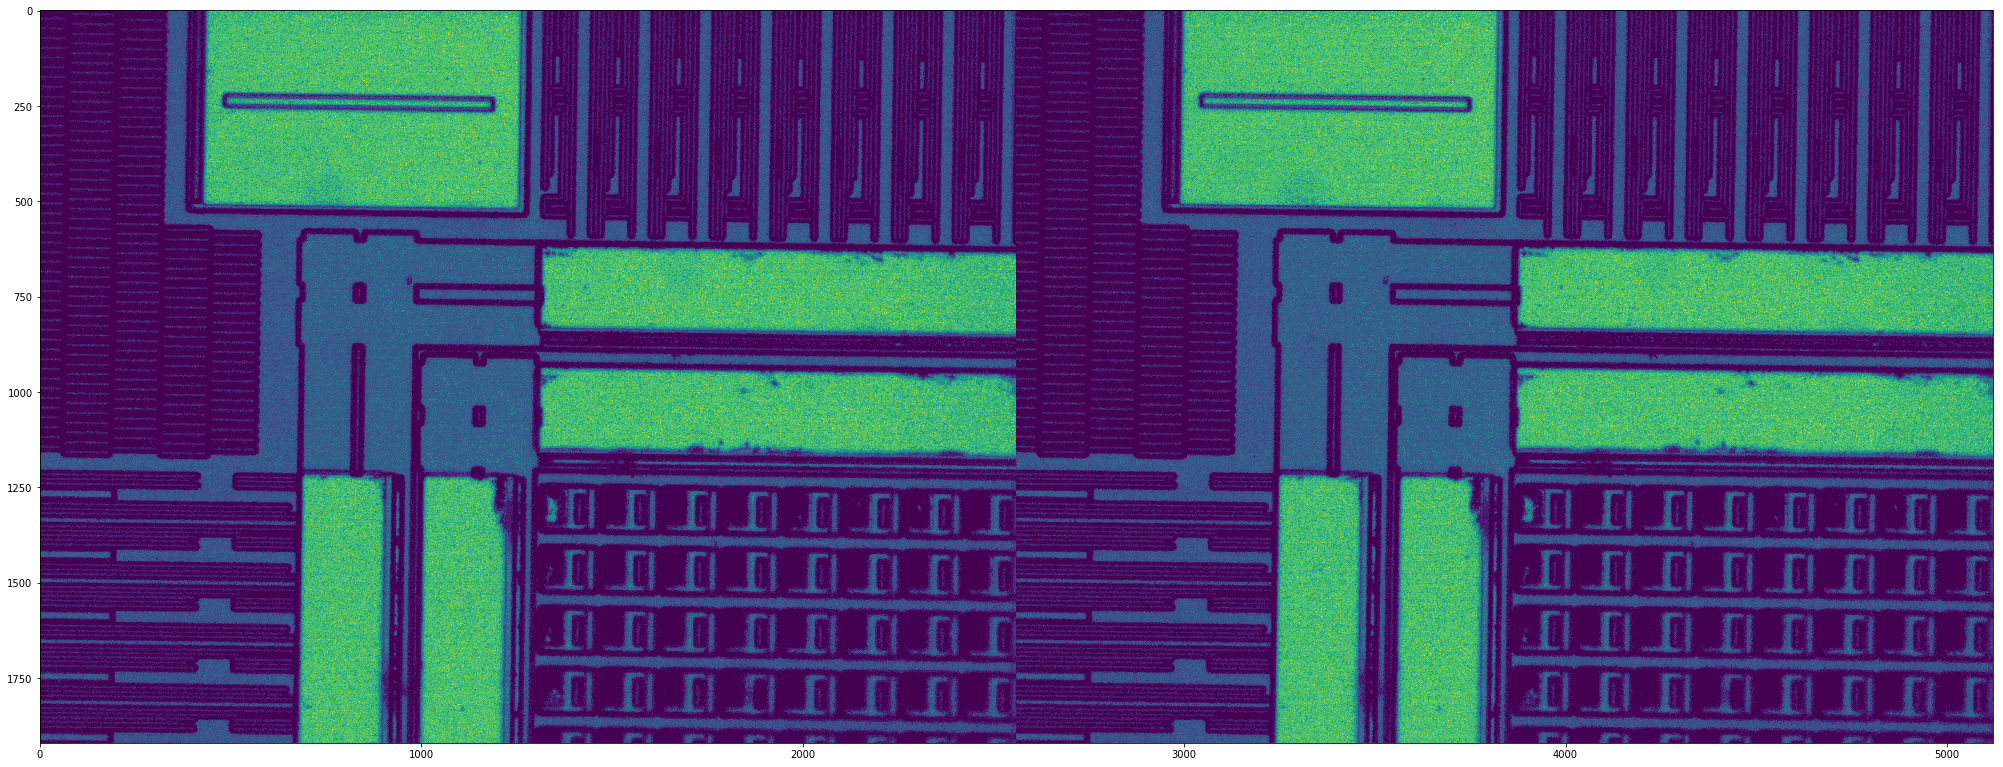

In [36]:
plot_image = np.concatenate((stitch[0,:,:,1], stitch[1,:,:,1]), axis=1)
plt.figure(figsize=(35,15))
plt.imshow(plot_image)

In [35]:
ofn = '/home/user/Desktop/Data/2017-10-17/tifffile.tif'
tifffile.imsave(str(ofn),stitch,compress=6)